In [11]:
%pylab inline
import sys
from scipy.interpolate import interp1d
sys.path.append('../../MW-LMC-SCF/code/')
import linecache
from scipy.signal import savgol_filter


Populating the interactive namespace from numpy and matplotlib


In [2]:
def get_center(coeff_path):
    line = linecache.getline(coeff_path, 5)
    line2 = line.split(":",1)[1].rstrip('\n')
    list_str = line2.replace('[', '').replace(']', '').split(' ')
    list_com = list(filter(None, list_str))
    
    xcom = float(list_com[0])
    ycom = float(list_com[1])
    zcom = float(list_com[2])
    
    
    line = linecache.getline(coeff_path, 6)
    line2 = line.split(":",1)[1].rstrip('\n')
    list_str = line2.replace('[', '').replace(']', '').split(' ')
    list_com = list(filter(None, list_str))
    
    vxcom = float(list_com[0])
    vycom = float(list_com[1])
    vzcom = float(list_com[2])
    
    return np.array([xcom, ycom, zcom]), np.array([vxcom, vycom, vzcom])

In [7]:
snap2=237
coeff_path = '../../time-dependent-BFE/data/MW_halo/BFE_MW2_10M_halo_vir_host_snap'
t_bfe_HR = np.arange(0, round(snap2*0.02, ndigits=2), 0.02)


rcom_all = np.zeros((int(snap2), 3))
vcom_all = np.zeros((int(snap2), 3))



for i in range(int(snap2)):
    rcom_all[i], vcom_all[i] = get_center(coeff_path+'_{:0>3d}.txt'.format(i))


(0.0, 20.0)

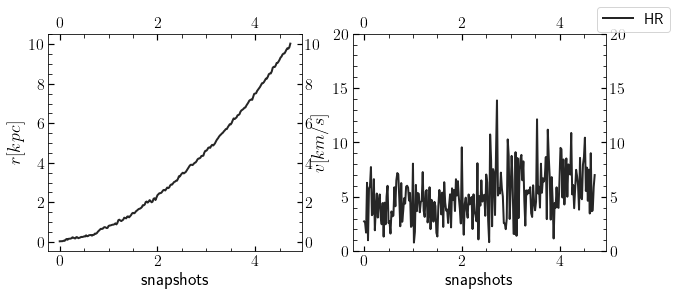

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].plot(t_bfe_HR, np.sqrt(np.sum(rcom_all**2, axis=1)), label=' HR', c='k', alpha=0.85, lw=2)
fig.legend(fontsize=15)
ax[0].set_xlabel('snapshots')
ax[0].set_ylabel('$r[kpc]$')

ax[1].plot(t_bfe_HR, np.sqrt(np.sum(vcom_all**2, axis=1)), label='vCOM HR', c='k', alpha=0.85, lw=2)
ax[1].set_xlabel('snapshots')
ax[1].set_ylabel('$v[km/s]$')
ax[1].set_ylim(0, 20)
#savefig('COM_position_vs_t.png', bbox_inches='tight')
#savefig('COM_position_vs_t.pdf', bbox_inches='tight')

In [44]:
x_smooth = savgol_filter(rcom_all[:,0], 81, 3) # window size 51, polynomial order 3
y_smooth = savgol_filter(rcom_all[:,1], 81, 3) # window size 51, polynomial order 3
z_smooth = savgol_filter(rcom_all[:,2], 101, 3) # window size 51, polynomial order 3


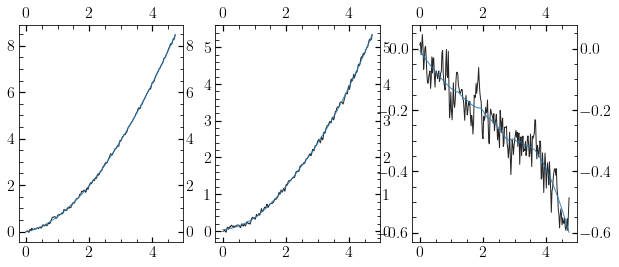

In [45]:
fig, ax = plt.subplots(1, 3, figsize=(10, 4))

ax[0].plot(t_bfe_HR, rcom_all[:,0], label=' HR', c='k', alpha=0.85, lw=1)
ax[0].plot(t_bfe_HR, x_smooth, label=' HR', c='C0', alpha=0.85, lw=1)

ax[1].plot(t_bfe_HR, rcom_all[:,1], label=' HR', c='k', alpha=0.85, lw=1)
ax[1].plot(t_bfe_HR, y_smooth, label=' HR', c='C0', alpha=0.85, lw=1)

ax[2].plot(t_bfe_HR, rcom_all[:,2], label=' HR', c='k', alpha=0.85, lw=1)
ax[2].plot(t_bfe_HR, z_smooth, label=' HR', c='C0', alpha=0.85, lw=1)


In [46]:
vx = np.gradient(t_bfe_HR, x_smooth)
vy = np.gradient(t_bfe_HR, y_smooth)
vz = np.gradient(t_bfe_HR, z_smooth)

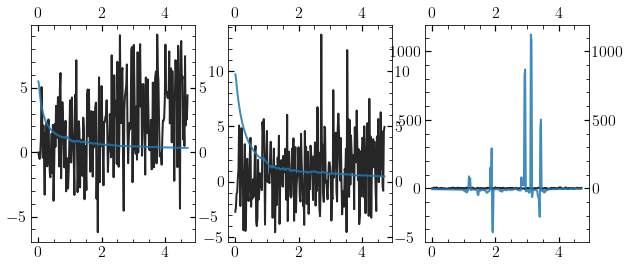

In [47]:
fig, ax = plt.subplots(1, 3, figsize=(10, 4))

ax[0].plot(t_bfe_HR, vcom_all[:,0], label=' HR', c='k', alpha=0.85, lw=2)
ax[0].plot(t_bfe_HR, vx, label=' HR', c='C0', alpha=0.85, lw=2)

ax[1].plot(t_bfe_HR, vcom_all[:,1], label=' HR', c='k', alpha=0.85, lw=2)
ax[1].plot(t_bfe_HR, vy, label=' HR', c='C0', alpha=0.85, lw=2)

ax[2].plot(t_bfe_HR, vcom_all[:,2], label=' HR', c='k', alpha=0.85, lw=2)
ax[2].plot(t_bfe_HR, vz, label=' HR', c='C0', alpha=0.85, lw=2)